Successfully prepared physical board.
Starting Stream
Stream Started
Ending stream
{'accel_channels': None,
 'eeg_channels': [1, 2, 3, 4],
 'eeg_names': 'TP9,AF7,AF8,TP10',
 'marker_channel': 7,
 'name': 'Muse2',
 'num_rows': 8,
 'other_channels': [5],
 'package_num_channel': 0,
 'sampling_rate': 256,
 'timestamp_channel': 6}
(4, 2532)


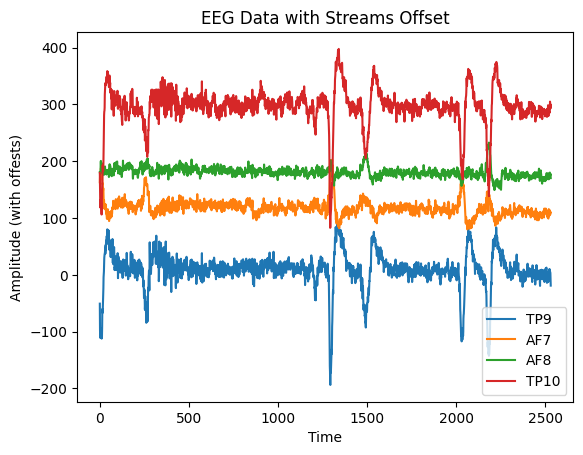

In [15]:
from brainflow.board_shim import BoardShim, BrainFlowInputParams, BoardIds
from brainflow.data_filter import DataFilter, FilterTypes
import numpy as np
import matplotlib.pyplot as plt
import time
from pprint import pprint


params = BrainFlowInputParams()
params.serial_port = 'COM3' #Change this depending on your device and OS
board_id = 38 #Change this depending on your device

#Prepares the board for reading data
try:
    board_id = 38
    board = BoardShim(board_id, params)
    board.prepare_session()
    print("Successfully prepared physical board.")
except Exception as e:
    print(e)
    #If the device cannot be found or is being used elsewhere, creates a synthetic board instead
    print("Device could not be found or is being used by another program, creating synthetic board.")
    board_id = BoardIds.SYNTHETIC_BOARD
    board = BoardShim(board_id, params)
    board.prepare_session()
#Releases the board session
board.release_session()

print("Starting Stream")
board.prepare_session()
board.start_stream()
print("Stream Started")
time.sleep(10) #wait 10 seconds
data = board.get_board_data() #gets all data from board and removes it from internal buffer
print("Ending stream")
board.stop_stream()
board.release_session()
pprint(BoardShim.get_board_descr(board_id))

#We want to isolate just the eeg data
eeg_channels = board.get_eeg_channels(board_id)
eeg_data = data[eeg_channels]
print(eeg_data.shape)

DataFilter.write_file(eeg_data, 'eeg_data_test.csv', 'w') #Writes into a csv file in the current directory

restored_data = DataFilter.read_file('eeg_data_test.csv') #Reads file back

offsets = [0, 100, 200, 300]
plt.plot(np.arange(eeg_data.shape[1]), eeg_data[0] + offsets[0], label="TP9")
plt.plot(np.arange(eeg_data.shape[1]), eeg_data[1] + offsets[1], label="AF7")
plt.plot(np.arange(eeg_data.shape[1]), eeg_data[2] + offsets[2], label="AF8")
plt.plot(np.arange(eeg_data.shape[1]), eeg_data[3] + offsets[3], label="TP10")

plt.xlabel('Time')
plt.ylabel('Amplitude (with offests)')
plt.legend()
plt.title('EEG Data with Streams Offset')
plt.show()